# **Package Installation**

In [1]:
# # install.packages(c("forecast", "dplyr","ggplot2", "tidyr", "lubridate", "caret"))
# install.packages(c("ggExtra", "ggcorrplot", "ggpubr", "plotly", "fmsb"))
# # Install and load the ggridges package
# install.packages("ggridges")

# **Library Import**

In [2]:
library(forecast)    # For time series forecasting using ARIMA model
library(dplyr)       # For data manipulation and preprocessing
library(tidyr)       # For data tidying and reshaping
library(ggplot2)
library(lubridate)   # For date-time manipulation
library(caret)       # For data splitting and model evaluation
library(ggExtra)
library(ggcorrplot)
library(ggpubr)
library(plotly)
library(fmsb)
library(ggridges)


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: lattice


Attaching package: ‘ggpubr’


The following object is masked from ‘package:forecast’:

    gghistogram



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Registered S3 methods overwritten by 'fmsb':
  method    from
  print.roc pROC
  plot.roc  pROC



# **Load Data**

In [3]:
# Load required packages
# Read CSV file
sales_data  <- read.csv("train.csv")

# View the first few rows of the dataset
head(sales_data )


Row.ID Order.ID       Order.Date Ship.Date  Ship.Mode      Customer.ID
1 1      CA-2017-152156 08/11/2017 11/11/2017 Second Class   CG-12520   
2 2      CA-2017-152156 08/11/2017 11/11/2017 Second Class   CG-12520   
3 3      CA-2017-138688 12/06/2017 16/06/2017 Second Class   DV-13045   
4 4      US-2016-108966 11/10/2016 18/10/2016 Standard Class SO-20335   
5 5      US-2016-108966 11/10/2016 18/10/2016 Standard Class SO-20335   
6 6      CA-2015-115812 09/06/2015 14/06/2015 Standard Class BH-11710   
  Customer.Name   Segment   Country       City            State     
1 Claire Gute     Consumer  United States Henderson       Kentucky  
2 Claire Gute     Consumer  United States Henderson       Kentucky  
3 Darrin Van Huff Corporate United States Los Angeles     California
4 Sean O'Donnell  Consumer  United States Fort Lauderdale Florida   
5 Sean O'Donnell  Consumer  United States Fort Lauderdale Florida   
6 Brosina Hoffman Consumer  United States Los Angeles     California
  Postal.Code Region Product.ID      Category        Sub.Category
1 42420       South  FUR-BO-10001798 Furniture       Bookcases   
2 42420       South  FUR-CH-10000454 Furniture       Chairs      
3 90036       West   OFF-LA-10000240 Office Supplies Labels      
4 33311       South  FUR-TA-10000577 Furniture       Tables      
5 33311       South  OFF-ST-10000760 Office Supplies Storage     
6 90032       West   FUR-FU-10001487 Furniture       Furnishings 
  Product.Name                                                     Sales   
1 Bush Somerset Collection Bookcase                                261.9600
2 Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back      731.9400
3 Self-Adhesive Address Labels for Typewriters by Universal         14.6200
4 Bretford CR4500 Series Slim Rectangular Table                    957.5775
5 Eldon Fold 'N Roll Cart System                                    22.3680
6 Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood  48.8600

# **Data Pre-Processing**

In [4]:
summary(sales_data )

     Row.ID       Order.ID          Order.Date         Ship.Date        
 Min.   :   1   Length:9800        Length:9800        Length:9800       
 1st Qu.:2451   Class :character   Class :character   Class :character  
 Median :4900   Mode  :character   Mode  :character   Mode  :character  
 Mean   :4900                                                           
 3rd Qu.:7350                                                           
 Max.   :9800                                                           
                                                                        
  Ship.Mode         Customer.ID        Customer.Name        Segment         
 Length:9800        Length:9800        Length:9800        Length:9800       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                               

In [5]:
colSums(is.na(sales_data ))

Row.ID      Order.ID    Order.Date     Ship.Date     Ship.Mode 
            0             0             0             0             0 
  Customer.ID Customer.Name       Segment       Country          City 
            0             0             0             0             0 
        State   Postal.Code        Region    Product.ID      Category 
            0            11             0             0             0 
 Sub.Category  Product.Name         Sales 
            0             0             0

In [6]:
# Check the shape of the dataset
shape <- dim(sales_data)

# Print the shape
cat("Number of rows:", shape[1], "\n")
cat("Number of columns:", shape[2], "\n")


Number of rows: 9800 
Number of columns: 18 


In [7]:
sum(is.na(sales_data ))
str(sales_data )

[1] 11

'data.frame':	9800 obs. of  18 variables:
 $ Row.ID       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Order.ID     : chr  "CA-2017-152156" "CA-2017-152156" "CA-2017-138688" "US-2016-108966" ...
 $ Order.Date   : chr  "08/11/2017" "08/11/2017" "12/06/2017" "11/10/2016" ...
 $ Ship.Date    : chr  "11/11/2017" "11/11/2017" "16/06/2017" "18/10/2016" ...
 $ Ship.Mode    : chr  "Second Class" "Second Class" "Second Class" "Standard Class" ...
 $ Customer.ID  : chr  "CG-12520" "CG-12520" "DV-13045" "SO-20335" ...
 $ Customer.Name: chr  "Claire Gute" "Claire Gute" "Darrin Van Huff" "Sean O'Donnell" ...
 $ Segment      : chr  "Consumer" "Consumer" "Corporate" "Consumer" ...
 $ Country      : chr  "United States" "United States" "United States" "United States" ...
 $ City         : chr  "Henderson" "Henderson" "Los Angeles" "Fort Lauderdale" ...
 $ State        : chr  "Kentucky" "Kentucky" "California" "Florida" ...
 $ Postal.Code  : int  42420 42420 90036 33311 33311 90032 90032 90032 90032 90032 ...
 $

In [8]:
sales_data  <- sales_data  %>% select(-Product.Name,-Country)
head(sales_data )

Row.ID Order.ID       Order.Date Ship.Date  Ship.Mode      Customer.ID
1 1      CA-2017-152156 08/11/2017 11/11/2017 Second Class   CG-12520   
2 2      CA-2017-152156 08/11/2017 11/11/2017 Second Class   CG-12520   
3 3      CA-2017-138688 12/06/2017 16/06/2017 Second Class   DV-13045   
4 4      US-2016-108966 11/10/2016 18/10/2016 Standard Class SO-20335   
5 5      US-2016-108966 11/10/2016 18/10/2016 Standard Class SO-20335   
6 6      CA-2015-115812 09/06/2015 14/06/2015 Standard Class BH-11710   
  Customer.Name   Segment   City            State      Postal.Code Region
1 Claire Gute     Consumer  Henderson       Kentucky   42420       South 
2 Claire Gute     Consumer  Henderson       Kentucky   42420       South 
3 Darrin Van Huff Corporate Los Angeles     California 90036       West  
4 Sean O'Donnell  Consumer  Fort Lauderdale Florida    33311       South 
5 Sean O'Donnell  Consumer  Fort Lauderdale Florida    33311       South 
6 Brosina Hoffman Consumer  Los Angeles     California 90032       West  
  Product.ID      Category        Sub.Category Sales   
1 FUR-BO-10001798 Furniture       Bookcases    261.9600
2 FUR-CH-10000454 Furniture       Chairs       731.9400
3 OFF-LA-10000240 Office Supplies Labels        14.6200
4 FUR-TA-10000577 Furniture       Tables       957.5775
5 OFF-ST-10000760 Office Supplies Storage       22.3680
6 FUR-FU-10001487 Furniture       Furnishings   48.8600

In [9]:
colnames(sales_data)

[1] "Row.ID"        "Order.ID"      "Order.Date"    "Ship.Date"    
 [5] "Ship.Mode"     "Customer.ID"   "Customer.Name" "Segment"      
 [9] "City"          "State"         "Postal.Code"   "Region"       
[13] "Product.ID"    "Category"      "Sub.Category"  "Sales"

In [10]:
# Print unique values of each column using cat() function
cat("Unique Ship.Mode:\n", unique(sales_data$Ship.Mode), "\n\n")
cat("Unique Segment:\n", unique(sales_data$Segment), "\n\n")
cat("Unique City:\n", unique(sales_data$City), "\n\n")
cat("Unique State:\n", unique(sales_data$State), "\n\n")
cat("Unique Region:\n", unique(sales_data$Region), "\n\n")
cat("Unique Category:\n", unique(sales_data$Category), "\n\n")
cat("Unique Sub.Category':\n", unique(sales_data$Sub.Category), "\n\n")

Unique Ship.Mode:
 Second Class Standard Class First Class Same Day 

Unique Segment:
 Consumer Corporate Home Office 

Unique City:
 Henderson Los Angeles Fort Lauderdale Concord Seattle Fort Worth Madison West Jordan San Francisco Fremont Philadelphia Orem Houston Richardson Naperville Melbourne Eagan Westland Dover New Albany New York City Troy Chicago Gilbert Springfield Jackson Memphis Decatur Durham Columbia Rochester Minneapolis Portland Saint Paul Aurora Charlotte Orland Park Urbandale Columbus Bristol Wilmington Bloomington Phoenix Roseville Independence Pasadena Newark Franklin Scottsdale San Jose Edmond Carlsbad San Antonio Monroe Fairfield Grand Prairie Redlands Hamilton Westfield Akron Denver Dallas Whittier Saginaw Medina Dublin Detroit Tampa Santa Clara Lakeville San Diego Brentwood Chapel Hill Morristown Cincinnati Inglewood Tamarac Colorado Springs Belleville Taylor Lakewood Arlington Arvada Hackensack Saint Petersburg Long Beach Hesperia Murfreesboro Layton Austin Low

In [11]:
tail(sales_data )

Row.ID Order.ID       Order.Date Ship.Date  Ship.Mode      Customer.ID
9795 9795   CA-2015-127166 21/05/2015 23/05/2015 Second Class   KH-16360   
9796 9796   CA-2017-125920 21/05/2017 28/05/2017 Standard Class SH-19975   
9797 9797   CA-2016-128608 12/01/2016 17/01/2016 Standard Class CS-12490   
9798 9798   CA-2016-128608 12/01/2016 17/01/2016 Standard Class CS-12490   
9799 9799   CA-2016-128608 12/01/2016 17/01/2016 Standard Class CS-12490   
9800 9800   CA-2016-128608 12/01/2016 17/01/2016 Standard Class CS-12490   
     Customer.Name    Segment   City    State    Postal.Code Region 
9795 Katherine Hughes Consumer  Houston Texas    77070       Central
9796 Sally Hughsby    Corporate Chicago Illinois 60610       Central
9797 Cindy Schnelling Corporate Toledo  Ohio     43615       East   
9798 Cindy Schnelling Corporate Toledo  Ohio     43615       East   
9799 Cindy Schnelling Corporate Toledo  Ohio     43615       East   
9800 Cindy Schnelling Corporate Toledo  Ohio     43615       East   
     Product.ID      Category        Sub.Category Sales  
9795 OFF-BI-10000977 Office Supplies Binders       18.240
9796 OFF-BI-10003429 Office Supplies Binders        3.798
9797 OFF-AR-10001374 Office Supplies Art           10.368
9798 TEC-PH-10004977 Technology      Phones       235.188
9799 TEC-PH-10000912 Technology      Phones        26.376
9800 TEC-AC-10000487 Technology      Accessories   10.384

# **Exploratory data analysis (EDA)**

### **Uni-Varient**

In [12]:
bar_plot_segment <- ggplot(sales_data, aes(x = Segment, fill = Segment)) +
  geom_bar() +
  labs(title = "Distribution by Segment",
       x = "Segment",
       y = "Count") +
  theme_light()
# Display the bar plot
print(bar_plot_segment)


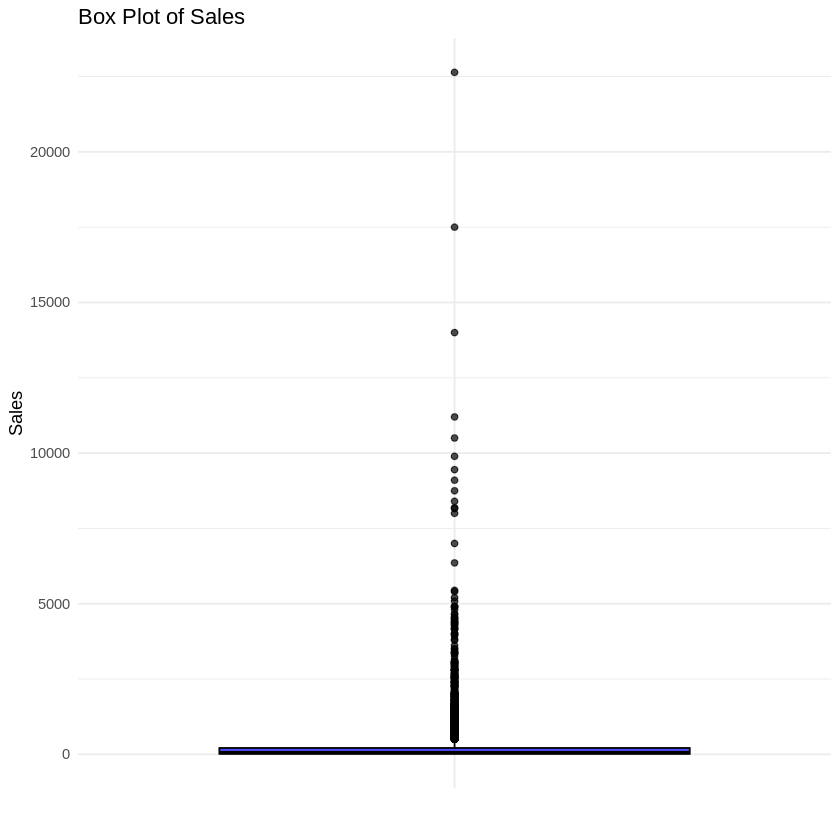

In [13]:
# Box Plot for 'Sales' column
box_plot_sales <- ggplot(sales_data, aes(x = "", y = Sales)) +
  geom_boxplot(fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Box Plot of Sales",
       x = "",
       y = "Sales") +
  theme_minimal()
box_plot_sales

In [14]:
# Pie Chart for 'Category' column
pie_chart_category <- ggplot(sales_data, aes(x = "", fill = Category)) +
  geom_bar(width = 1) +
  coord_polar("y", start=0) +
  labs(title = "Pie Chart of Category Distribution",
       x = "") +
  theme_void()
pie_chart_category

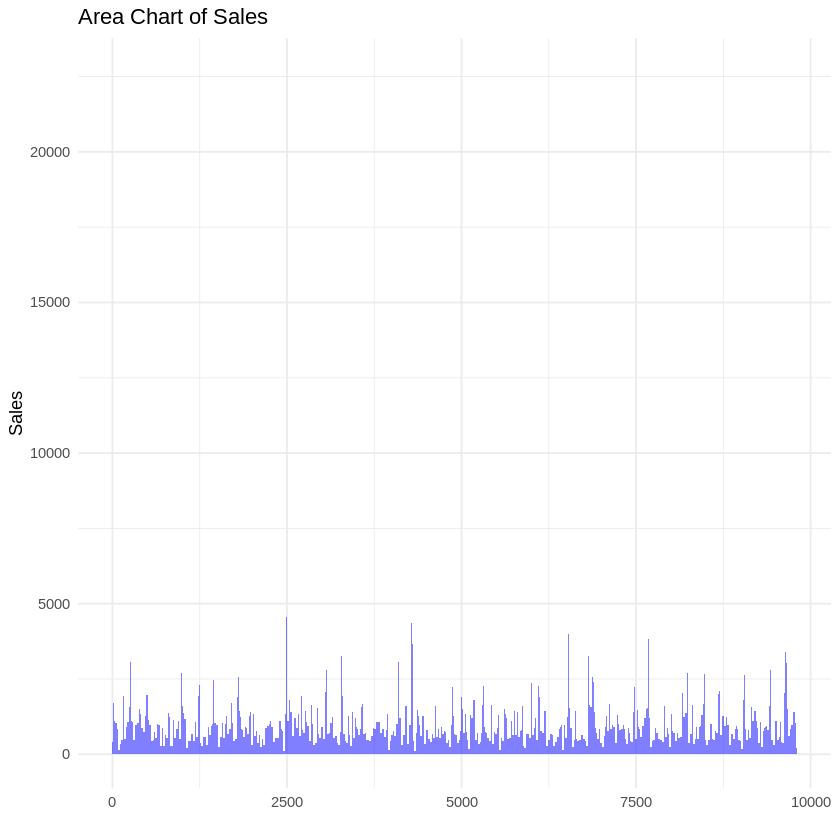

In [15]:
# Area Chart for 'Sales' column
area_chart_sales <- ggplot(sales_data, aes(x = Row.ID, y = Sales)) +
  geom_area(fill = "blue", alpha = 0.5) +
  labs(title = "Area Chart of Sales",
       x = "",
       y = "Sales") +
  theme_minimal()
area_chart_sales

Picking joint bandwidth of 40.8



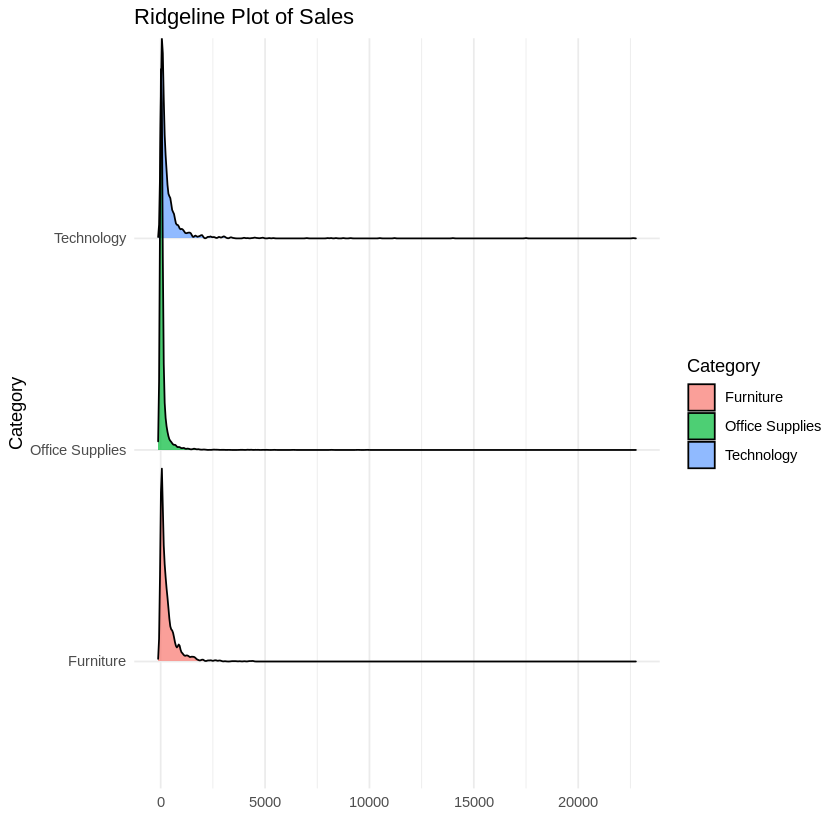

In [16]:

# Ridgeline Plot for 'Sales' column
ridgeline_plot_sales <- ggplot(sales_data, aes(x = Sales, y = Category, fill = Category)) +
  geom_density_ridges(alpha = 0.7) +
  labs(title = "Ridgeline Plot of Sales",
       x = "",
       y = "Category") +
  theme_minimal()

# Display the Ridgeline Plot
print(ridgeline_plot_sales)


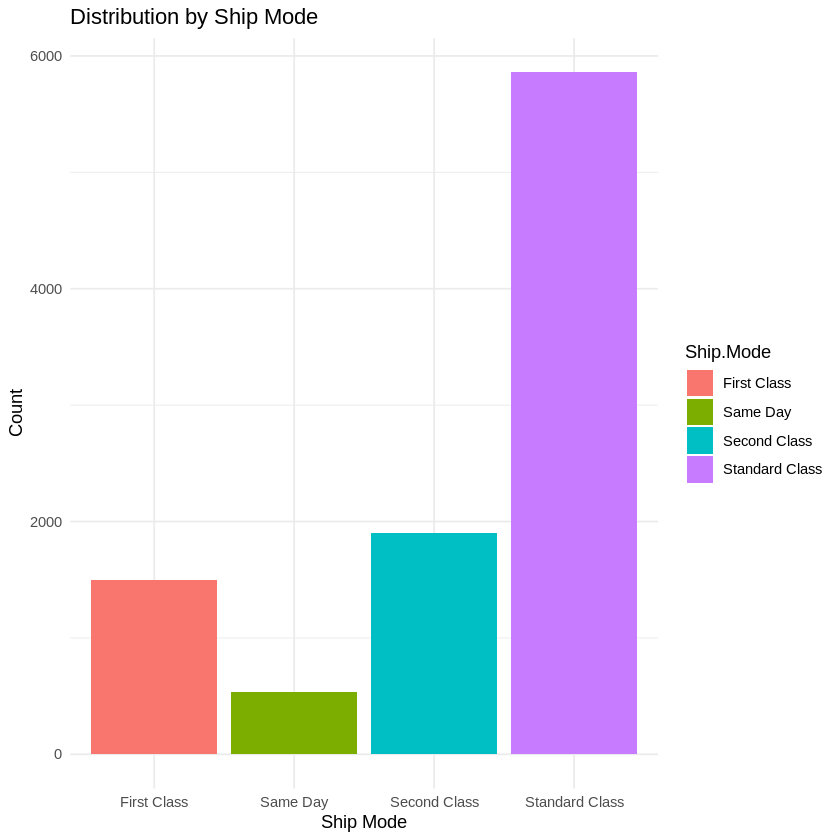

In [17]:
bar_plot_ship_mode <- ggplot(sales_data, aes(x = Ship.Mode, fill = Ship.Mode)) +
  geom_bar() +
  labs(title = "Distribution by Ship Mode",
       x = "Ship Mode",
       y = "Count") +
  theme_minimal()
print(bar_plot_ship_mode)


## **Bi-Varient**

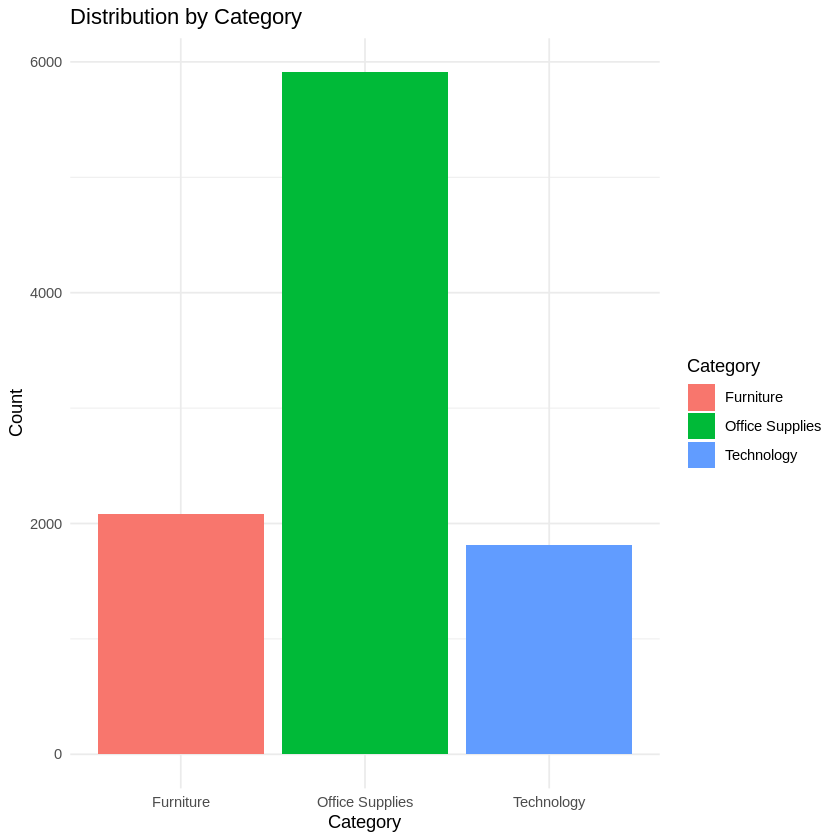

In [18]:
# Bar Chart for 'Category' column
bar_plot_category <- ggplot(sales_data, aes(x = Category, fill = Category)) +
  geom_bar() +
  labs(title = "Distribution by Category",
       x = "Category",
       y = "Count") +
  theme_minimal()
bar_plot_category

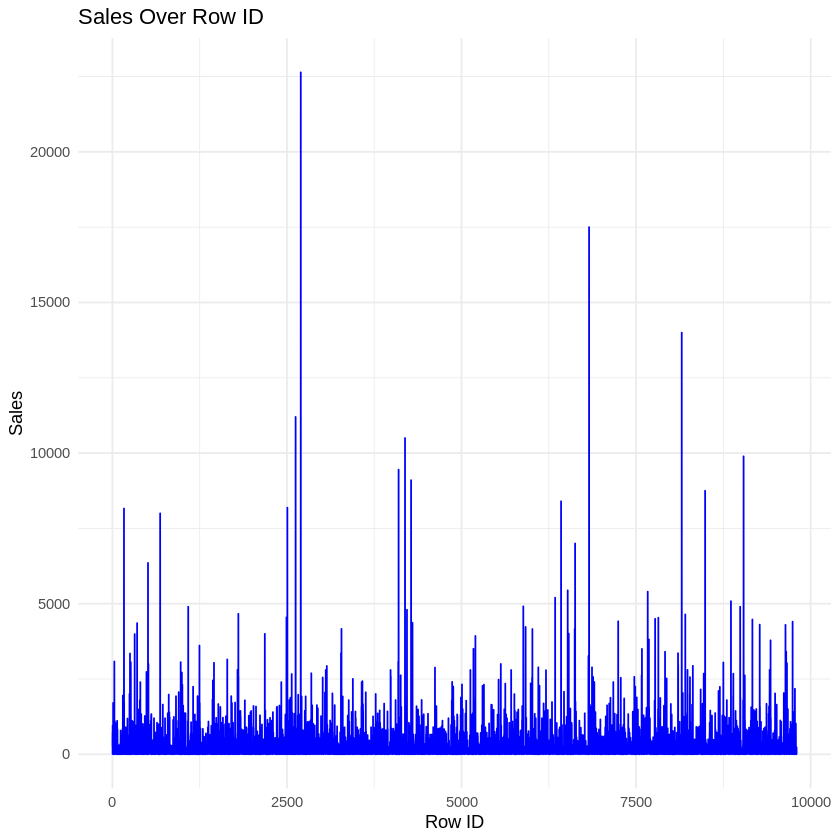

In [19]:
# Line Chart for 'Sales' column
line_chart_sales <- ggplot(sales_data, aes(x = Row.ID, y = Sales, group = 1)) +
  geom_line(color = "blue") +
  labs(title = "Sales Over Row ID",
       x = "Row ID",
       y = "Sales") +
  theme_minimal()
line_chart_sales

In [20]:
# Scatter Plot for 'Sales' and 'Category' columns
scatter_plot_sales_category <- ggplot(sales_data, aes(x = Category, y = Sales)) +
  geom_point(aes(color = Category)) +
  labs(title = "Sales by Category",
       x = "Category",
       y = "Sales") +
  theme_minimal()
scatter_plot_sales_category

## **Multi Varient**

In [21]:
# Scatter Plot Matrix
pairs(sales_data[, c("Sales", "Row.ID")])


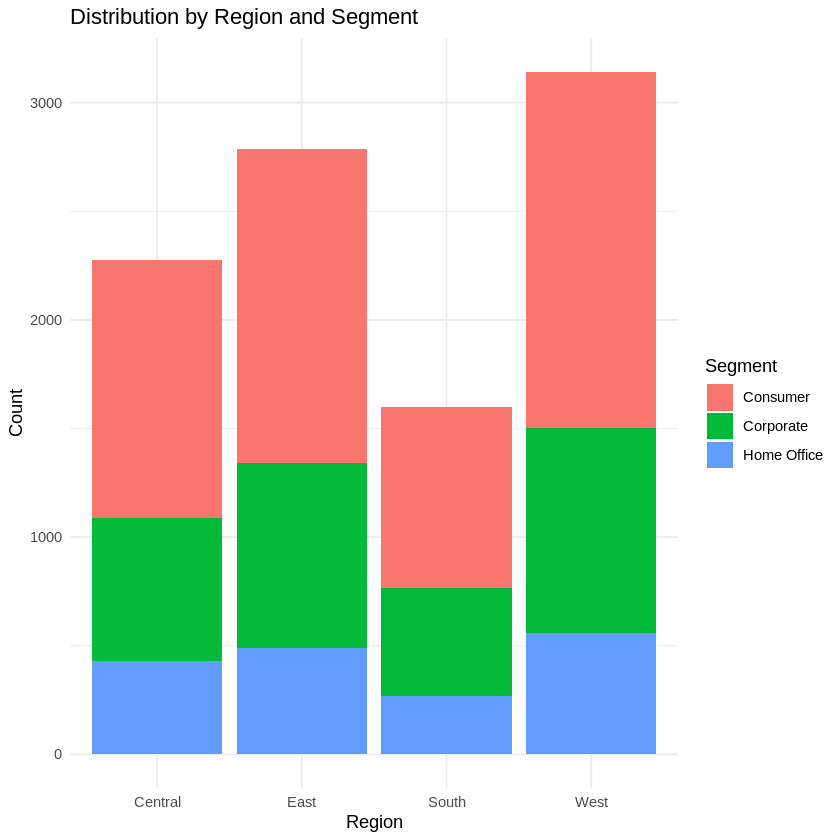

In [22]:
bar_region_segment <- ggplot(sales_data, aes(x = Region, fill = Segment)) +
  geom_bar() +
  labs(title = "Distribution by Region and Segment",
       x = "Region",
       y = "Count",
       fill = "Segment") +
  theme_minimal()

print(bar_region_segment)


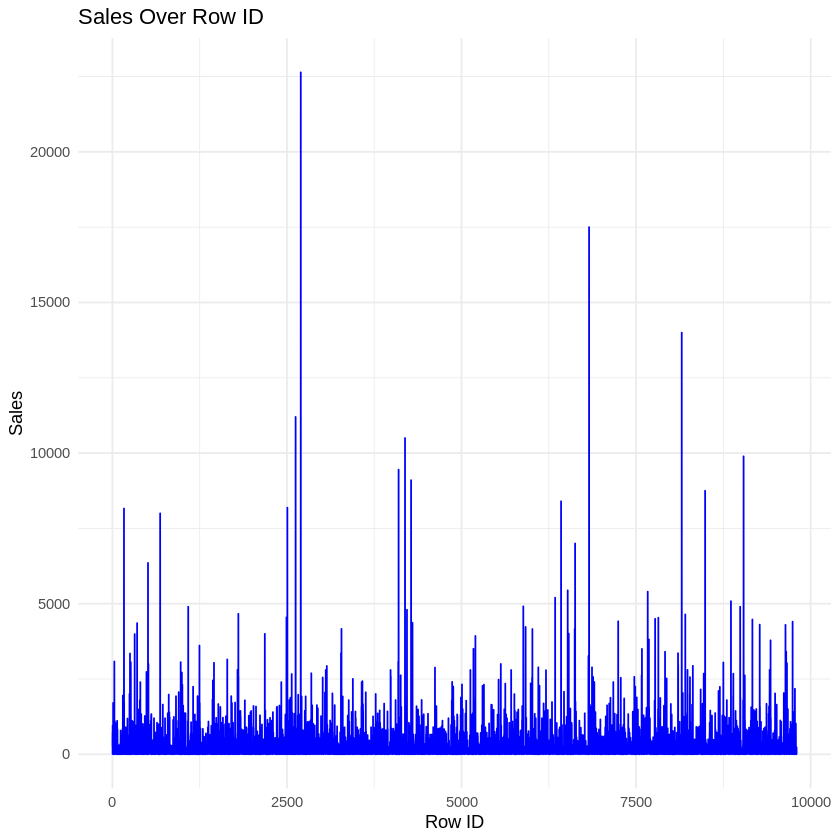

In [23]:
# Line plot for 'Sales' over 'Row.ID'
line_sales_rowid <- ggplot(sales_data, aes(x = Row.ID, y = Sales)) +
  geom_line(color = "blue") +
  labs(title = "Sales Over Row ID",
       x = "Row ID",
       y = "Sales") +
  theme_minimal()

print(line_sales_rowid)


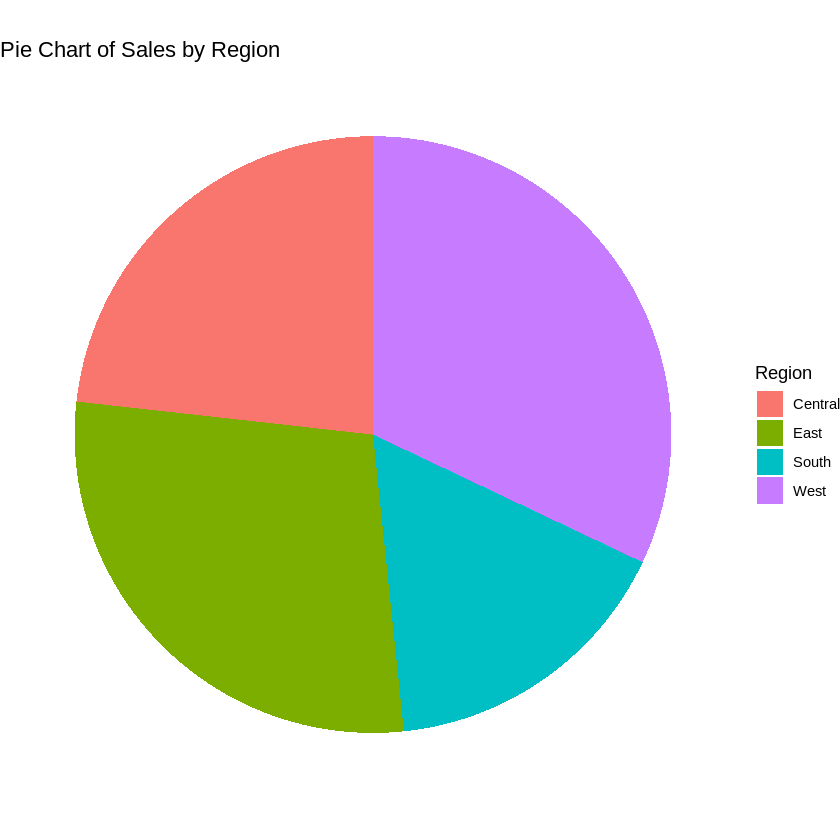

In [24]:
# Pie chart for 'Region' distribution
pie_region <- ggplot(sales_data, aes(x = "", fill = Region)) +
  geom_bar(width = 1) +
  coord_polar("y", start=0) +
  labs(title = "Pie Chart of Sales by Region",
       x = "") +
  theme_void()

print(pie_region)


# **Sales Forecast**

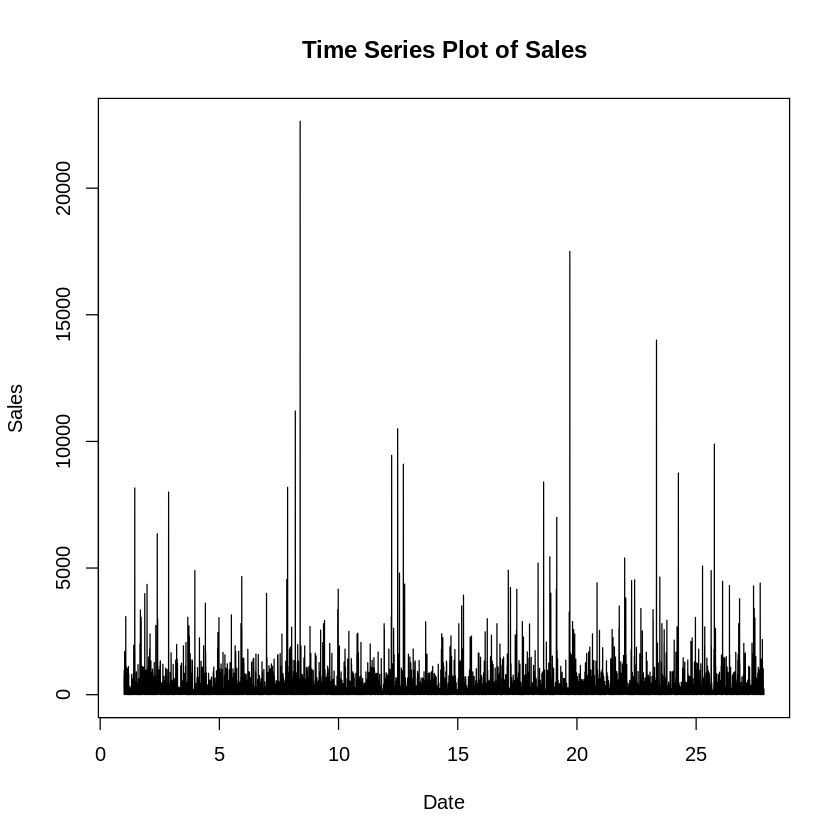

In [25]:
# Convert 'Order.Date' to Date format
sales_data$Order.Date <- as.Date(sales_data$Order.Date, format="%m/%d/%Y")

# Create a time series object
sales_ts <- ts(sales_data$Sales, frequency = 365)

# Time Series Plot
plot(sales_ts, main = "Time Series Plot of Sales", xlab = "Date", ylab = "Sales")


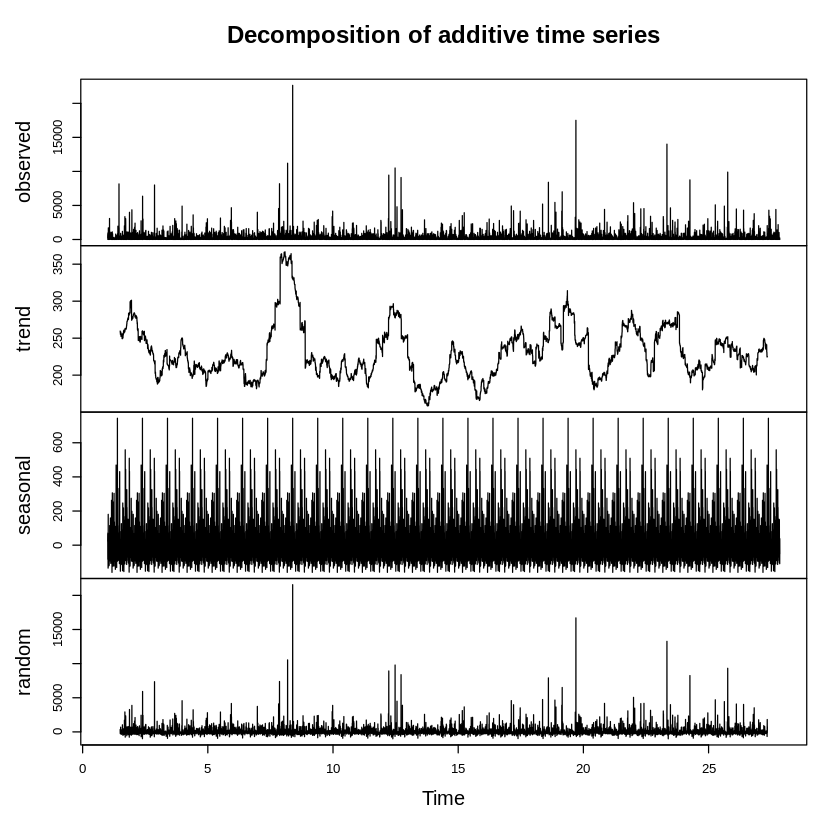

In [26]:
# Decompose the time series
sales_decomp <- decompose(sales_ts)

# Decomposition Plot
plot(sales_decomp)


# **Model Implementation**

## **Naive Model**

In [30]:
# Generate dummy variables for categorical variables
sales_data_dummies <- model.matrix(~ Ship.Mode + Segment + City + State + Region + Category + Sub.Category - 1, data = sales_data)

# Remove one dummy variable from each categorical variable to avoid multicollinearity
sales_data_dummies <- sales_data_dummies[, !duplicated(colnames(sales_data_dummies))]

# Combine Sales and dummy variables
xreg_data <- cbind(Sales = sales_data$Sales, sales_data_dummies)


In [31]:
# Calculate the mean of historical sales data
mean_sales <- mean(xreg_data[, "Sales", drop = FALSE])

# Create a forecast object for the naive model
fit_naive <- list(mean = mean_sales, x = NULL)

# Print Naive model forecast
print(fit_naive)


$mean
[1] 230.7691

$x
NULL



In [32]:
# Calculate forecast errors for the naive model
forecast_errors <- xreg_data[, "Sales", drop = FALSE] - mean_sales

# Calculate Mean Absolute Error (MAE)
mae <- mean(abs(forecast_errors))

# Calculate Root Mean Squared Error (RMSE)
rmse <- sqrt(mean(forecast_errors^2))

# Calculate Mean Absolute Percentage Error (MAPE)
mape <- mean(abs(forecast_errors / xreg_data[, "Sales", drop = FALSE]) * 100)

# Print accuracy metrics
cat("Naive Model Accuracy Metrics:\n")
cat(paste("Mean Absolute Error (MAE):", round(mae, 2), "\n"))
cat(paste("Root Mean Squared Error (RMSE):", round(rmse, 2), "\n"))
cat(paste("Mean Absolute Percentage Error (MAPE):", round(mape, 2), "%\n"))


Naive Model Accuracy Metrics:
Mean Absolute Error (MAE): 269.37 
Root Mean Squared Error (RMSE): 626.62 
Mean Absolute Percentage Error (MAPE): 1098.02 %


## **ETS Model**

In [33]:
# Fit ETS model
ets_model <- ets(sales_ts)

# Check model summary
summary(ets_model)


Warning message in ets(sales_ts):
“I can't handle data with frequency greater than 24. Seasonality will be ignored. Try stlf() if you need seasonal forecasts.”


ETS(M,Ad,N) 

Call:
 ets(y = sales_ts) 

  Smoothing parameters:
    alpha = 4e-04 
    beta  = 4e-04 
    phi   = 0.9091 

  Initial states:
    l = 510.8968 
    b = -28.2176 

  sigma:  2.7074

     AIC     AICc      BIC 
216078.9 216078.9 216122.1 

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.3059478 627.1708 269.7467 -1069.332 1093.689 0.7886333
                    ACF1
Training set 0.007587502

In [34]:
# Forecast sales for the next 3 months
forecast_values <- forecast(ets_model, h = 3)

# Print forecast values
print(forecast_values)


         Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
27.84932       243.5474 -601.4885 1088.583 -1048.824 1535.918
27.85205       243.2618 -600.7847 1087.308 -1047.596 1534.120
27.85479       243.0022 -600.1468 1086.151 -1046.483 1532.487


In [35]:
forecasted_sales <- forecast_values$mean

# Extract actual values for the forecast period
actual_sales <- sales_data$Sales[(nrow(sales_data) - length(forecasted_sales) + 1):nrow(sales_data)]

# Compute accuracy metrics
mae <- mean(abs(forecasted_sales - actual_sales))
rmse <- sqrt(mean((forecasted_sales - actual_sales)^2))
mape <- mean(abs((actual_sales - forecasted_sales) / actual_sales)) * 100
mape <- mean(abs((actual_sales - forecasted_sales) / actual_sales)) * 100

# Print accuracy metrics
cat("Mean Absolute Error (MAE):", round(mae, 2), "\n")
cat("Root Mean Square Error (RMSE):", round(rmse, 2), "\n")
cat("Mean Absolute Percentage Error (MAPE):", round(mape, 2), "%\n")


Mean Absolute Error (MAE): 152.62 
Root Mean Square Error (RMSE): 183.69 
Mean Absolute Percentage Error (MAPE): 1022 %
